In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import os
os.makedirs('/content/drive/MyDrive/Deep learning project', exist_ok=True)


Trained and tested 4 models on CIFAR-10 dataset
- MobileNetV2 (simple)
- DenseNet169
- MobileNetV2 (with hypertuning)
- EfficientNetB0(with hypertuning)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


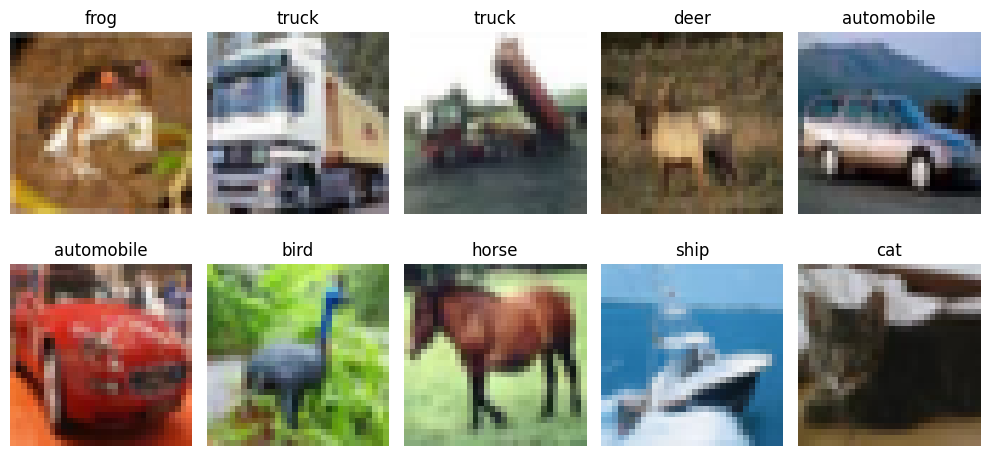

In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Visualize some examples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i][0]]) # Changed this line
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Resize images to (96, 96)
X_train_resized = tf.image.resize(X_train, (96, 96))
X_test_resized = tf.image.resize(X_test, (96, 96))

# Convert to numpy and preprocess for MobileNetV2
# converts these tensors to NumPy arrays, which some preprocessing functions require.
X_train_processed = preprocess_input(X_train_resized.numpy())
X_test_processed = preprocess_input(X_test_resized.numpy())

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


## MobileNetV2

In [ ]:
# Build transfer learning model
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), # Pool spatial features into a vector
    layers.Dense(128, activation='relu'), # Fully connected layer to learn new patterns
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (Fashion MNIST)
])

In [ ]:
# Compile model
# Compile the model with Adam optimizer and categorical crossentropy loss

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# from tensorflow.keras.callbacks import ModelCheckpoint
# Update checkpoint to save in Google Drive
# checkpoint_1 = ModelCheckpoint(
#     '/content/drive/MyDrive/Deep learning project/MobileNetV2_1.keras',  # Changed path
#     monitor='val_accuracy',
#     save_best_only=True,
#     verbose=1
# )


# Train
history = model.fit(X_train_processed, y_train_cat, validation_split=0.2, epochs=5, batch_size=64) #, callbacks=[checkpoint_1])

Epoch 1/5
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7701 - loss: 0.6879
Epoch 1: val_accuracy improved from -inf to 0.85040, saving model to /content/drive/MyDrive/Deep learning project/MobileNetV2_1.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.7703 - loss: 0.6871 - val_accuracy: 0.8504 - val_loss: 0.4279
Epoch 2/5
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8739 - loss: 0.3643
Epoch 2: val_accuracy improved from 0.85040 to 0.86830, saving model to /content/drive/MyDrive/Deep learning project/MobileNetV2_1.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8739 - loss: 0.3643 - val_accuracy: 0.8683 - val_loss: 0.3904
Epoch 3/5
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8993 - loss: 0.2898
Epoch 3: val_accuracy did not improve from 0.86830
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8993 - loss: 0.2899 - val_accuracy: 0.8602 - val_loss: 0.4112
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy:

In [ ]:
model.save("/content/drive/MyDrive/Deep learning project/simple_mobilnetV2_model.keras")

from google.colab import files
files.download("/content/drive/MyDrive/Deep learning project/simple_mobilnetV2_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluate the model

In [ ]:
est_loss, test_acc = model.evaluate(X_test_processed, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred_probs = model.predict(X_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8680 - loss: 0.4161
Test Accuracy: 0.8612
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.89      0.86      0.88      1000
  automobile       0.94      0.92      0.93      1000
        bird       0.77      0.89      0.83      1000
         cat       0.75      0.74      0.75      1000
        deer       0.84      0.83      0.84      1000
         dog       0.80      0.80      0.80      1000
        frog       0.88      0.90      0.89      1000
       horse       0.92      0.85      0.88      1000
        ship       0.91      0.92      0.91      1000
       truck       0.92      0.92      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



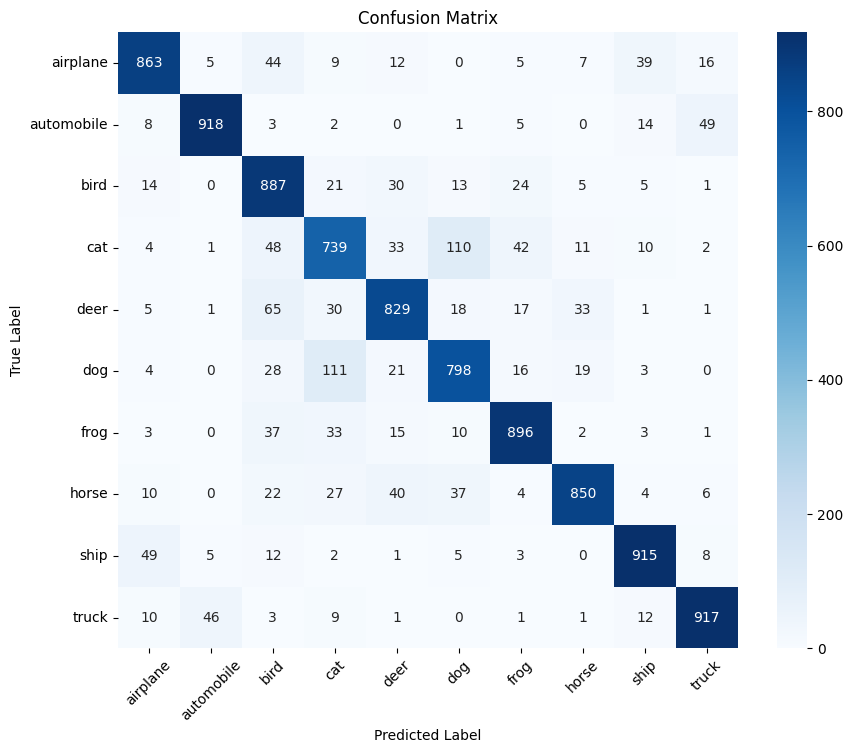

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## unfreeze the last few layers of MobileNetV2 and fine-tune it

In [ ]:
from tensorflow.keras import optimizers
# Unfreeze last layers of base model for fine-tuning
base_model.trainable = True

# Freeze all layers except the last N (e.g., last 20 layers)
fine_tune_at = len(base_model.layers) - 20
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
# Compile model with a lower learning rate
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training (fine-tuning)
fine_tune_epochs = 5
total_epochs = 3 + fine_tune_epochs  # if trained earlier 3 epochs

# Update checkpoint to save in Google Drive
# checkpoint_2 = ModelCheckpoint(
#     '/content/drive/MyDrive/Deep learning project/MobileNetV2_1_unfreeze.keras',  # Changed path
#     monitor='val_accuracy',
#     save_best_only=True,
#     verbose=1
# )


history_fine = model.fit(
    X_train_processed, y_train_cat,
    validation_split=0.2,
    epochs=total_epochs,
    initial_epoch=3,
    batch_size=64 #,
    # callbacks = [checkpoint_2]
)




Epoch 4/8
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7990 - loss: 0.6767
Epoch 4: val_accuracy improved from -inf to 0.86170, saving model to /content/drive/MyDrive/Deep learning project/MobileNetV2_1_unfreeze.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.7992 - loss: 0.6760 - val_accuracy: 0.8617 - val_loss: 0.4624
Epoch 5/8
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8834 - loss: 0.3402
Epoch 5: val_accuracy improved from 0.86170 to 0.86720, saving model to /content/drive/MyDrive/Deep learning project/MobileNetV2_1_unfreeze.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8834 - loss: 0.3402 - val_accuracy: 0.8672 - val_loss: 0.4290
Epoch 6/8
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9028 - loss: 0.2779
Epoch 6: val_accuracy improved from 0.86720 to 0.87150, saving model to /content/drive/MyDrive/Deep learning project/MobileNetV2_1_unfreeze.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9028 - loss:

In [ ]:
model.save("/content/drive/MyDrive/Deep learning project/MobileNetV2_1_unfreeze.keras")
from google.colab import files
files.download("/content/drive/MyDrive/Deep learning project/MobileNetV2_1_unfreeze.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test_processed, y_test_cat)
print(f"Test Accuracy after fine-tuning: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8769 - loss: 0.4034
Test Accuracy after fine-tuning: 0.8721


## DenseNet169

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# === PHASE 1: Train Classifier (Freeze Backbone)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
base_model.trainable = False   # freeze first

model_DenseNet169 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# === 2. PHASE 1: Train Classifier (Keep your 3 epochs) ===
model_DenseNet169.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("PHASE 1: Training classifier...")
history = model_DenseNet169.fit(
    X_train_processed, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

# === 3. PHASE 2: Fine-tuning with SMART TUNING ===
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 20
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# MILD AUGMENTATION
# dat to prevent overfit
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

# COSINE DECAY + LOW INITIAL LR
initial_lr = 1e-4
steps_per_epoch = len(X_train_processed) * 0.8 // 64
lr_schedule = CosineDecay(initial_learning_rate=initial_lr, decay_steps=20 * steps_per_epoch)

model_DenseNet169.compile(
    optimizer=optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Update checkpoint to save in Google Drive
# checkpoint_5 = ModelCheckpoint(
#     '/content/drive/MyDrive/Deep learning project/DenseNet169.keras',  # Changed path
#     monitor='val_accuracy',
#     save_best_only=True,
#     verbose=1
# )

print("\nPHASE 2: Fine-tuning with augmentation & cosine LR...")
history_fine = model_DenseNet169.fit(
    datagen.flow(X_train_processed, y_train_cat, batch_size=64, shuffle=True),
    steps_per_epoch=len(X_train_processed) // 64,
    validation_data=datagen.flow(X_train_processed, y_train_cat, batch_size=64, shuffle=False),
    validation_steps=len(X_train_processed) // 64,
    epochs=30,
    callbacks=[
        EarlyStopping(patience=8, restore_best_weights=True, monitor='val_accuracy'),
        ReduceLROnPlateau(patience=4, factor=0.5, min_lr=1e-7, monitor='val_accuracy') #,
        # checkpoint_5
    ],
    verbose=1
)

# === EVALUATE ON TEST SET ===
loss, acc = model_DenseNet169.evaluate(X_test_processed, y_test_cat, verbose=0)
print(f"\nFINAL TEST ACCURACY: {acc:.4f} ({acc*100:.2f}%)")

PHASE 1: Training classifier...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 105ms/step - accuracy: 0.6873 - loss: 0.9875 - val_accuracy: 0.8318 - val_loss: 0.4900
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8183 - loss: 0.5341 - val_accuracy: 0.8400 - val_loss: 0.4663
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8393 - loss: 0.4702 - val_accuracy: 0.8490 - val_loss: 0.4435
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.8495 - loss: 0.4322 - val_accuracy: 0.8542 - val_loss: 0.4337
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8572 - loss: 0.4065 - val_accuracy: 0.8547 - val_loss: 0.4315
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.8654 - loss: 0.3811 - val_accuracy: 0.8556 - val_loss: 0.4290
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8755 - loss: 0.3544 - val_accuracy: 0.8563 - val_loss: 0.4412
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - a

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.87148
781/781 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.8594 - loss: 0.4064 - val_accuracy: 0.8702 - val_loss: 0.3780 - learning_rate: 9.9037e-05
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8384 - loss: 0.4734
Epoch 3: val_accuracy improved from 0.87148 to 0.88578, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 203s 260ms/step - accuracy: 0.8384 - loss: 0.4734 - val_accuracy: 0.8858 - val_loss: 0.3305 - learning_rate: 9.6192e-05
Epoch 4/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.8438 - loss: 0.4627
Epoch 4: val_accuracy did not improve from 0.88578
781/781 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.8438 - loss: 0.4627 - val_accuracy: 0.8852 - val_loss: 0.3343 - learning_rate: 9.6187e-05
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8507 - loss: 0.4376
Epoch 5: val_accuracy improved from 0.88578 to 0.89

In [ ]:
loss, acc = model_DenseNet169.evaluate(X_test_processed, y_test_cat, verbose=0)
print(f"\nFINAL VAL ACCURACY: {acc:.4f} ({acc*100:.2f}%)")


FINAL VAL ACCURACY: 0.8990 (89.90%)


In [ ]:
model_DenseNet169.save("/content/drive/MyDrive/Deep learning project/model_DenseNet169.keras")
from google.colab import files
files.download("/content/drive/MyDrive/Deep learning project/model_DenseNet169.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## MobileNetV2 (with hypertuning)

##### STEP 1: Freeze backbone → train only classifier (prevent overfitting)
##### STEP 2: Unfreeze + low LR → fine-tune all layers
##### STEP 3: Add mild augmentation + dropout

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === 1. Build Model (Your Code - Unchanged) ===
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model_MobileNetV2_2 = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # assuming 10 classes
])

# === 2. PHASE 1: Train Classifier (Keep your 3 epochs) ===
model_MobileNetV2_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("PHASE 1: Training classifier...")
history = model_MobileNetV2_2.fit(
    X_train_processed, y_train_cat,
    validation_split=0.2,
    epochs=3,
    batch_size=64,
    verbose=1
)

# === 3. PHASE 2: Fine-tuning with SMART TUNING ===
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 20
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# MILD AUGMENTATION
# dat to prevent overfit
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)

# COSINE DECAY + LOW INITIAL LR
initial_lr = 1e-4
steps_per_epoch = len(X_train_processed) * 0.8 // 64
lr_schedule = CosineDecay(initial_learning_rate=initial_lr, decay_steps=20 * steps_per_epoch)

model_MobileNetV2_2.compile(
    optimizer=optimizers.Adam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Update checkpoint to save in Google Drive
# checkpoint_6 = ModelCheckpoint(
#     '/content/drive/MyDrive/Deep learning project/DenseNet169.keras',  # Changed path
#     monitor='val_accuracy',
#     save_best_only=True,
#     verbose=1
# )


print("\nPHASE 2: Fine-tuning with augmentation & cosine LR...")
history_fine = model_MobileNetV2_2.fit(
    datagen.flow(X_train_processed, y_train_cat, batch_size=64, shuffle=True),
    steps_per_epoch=len(X_train_processed) // 64,
    validation_data=datagen.flow(X_train_processed, y_train_cat, batch_size=64, shuffle=False),
    validation_steps=len(X_train_processed) // 64,
    epochs=30,
    callbacks=[
        EarlyStopping(patience=8, restore_best_weights=True, monitor='val_accuracy'),
        ReduceLROnPlateau(patience=4, factor=0.5, min_lr=1e-7, monitor='val_accuracy')#,
        # checkpoint_6
    ],
    verbose=1
)



PHASE 1: Training classifier...
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.7225 - loss: 0.8434 - val_accuracy: 0.8535 - val_loss: 0.4178
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8346 - loss: 0.4830 - val_accuracy: 0.8614 - val_loss: 0.4001
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8580 - loss: 0.4123 - val_accuracy: 0.8667 - val_loss: 0.3839

PHASE 2: Fine-tuning with augmentation & cosine LR...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7975 - loss: 0.6463
Epoch 1: val_accuracy improved from -inf to 0.87282, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 213s 256ms/step - accuracy: 0.7975 - loss: 0.6462 - val_accuracy: 0.8728 - val_loss: 0.3658 - learning_rate: 9.9040e-05
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9062 - loss: 0.2821

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.87282
781/781 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.9062 - loss: 0.2821 - val_accuracy: 0.8719 - val_loss: 0.3689 - learning_rate: 9.9037e-05
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8602 - loss: 0.4121
Epoch 3: val_accuracy did not improve from 0.87282
781/781 ━━━━━━━━━━━━━━━━━━━━ 190s 243ms/step - accuracy: 0.8602 - loss: 0.4121 - val_accuracy: 0.8673 - val_loss: 0.3848 - learning_rate: 9.6192e-05
Epoch 4/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7344 - loss: 0.5861
Epoch 4: val_accuracy did not improve from 0.87282
781/781 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.7344 - loss: 0.5861 - val_accuracy: 0.8705 - val_loss: 0.3786 - learning_rate: 9.6187e-05
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8815 - loss: 0.3525
Epoch 5: val_accuracy improved from 0.87282 to 0.89899, saving model to /content/drive/MyDrive/Deep learning project/DenseNet169.keras
78

In [ ]:
# === EVALUATE ON TEST SET ===
loss, acc = model_MobileNetV2_2.evaluate(X_test_processed, y_test_cat, verbose=0)
print(f"\nFINAL TEST ACCURACY: {acc:.4f} ({acc*100:.2f}%)")


FINAL TEST ACCURACY: 0.9093 (90.93%)


In [ ]:
model_MobileNetV2_2.save("/content/drive/MyDrive/Deep learning project/model_MobileNetV2_2.keras")
from google.colab import files
files.download("/content/drive/MyDrive/Deep learning project/model_MobileNetV2_2.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(16, 8))

# Accuracy (left side – big)
plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Train Accuracy', color='#3498db', linewidth=3.5)
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy', color='#e74c3c', linewidth=4)

# Vertical line at unfreeze point
unfreeze_epoch = 10  # change to your actual number
plt.axvline(x=unfreeze_epoch, color='green', linewidth=4, linestyle='--', alpha=0.9)
plt.text(unfreeze_epoch+1, 0.75, 'Unfreeze\nBackbone', fontsize=16, fontweight='bold',
         color='green', bbox=dict(facecolor='white', alpha=0.9, edgecolor='green'))

# plt.title('EfficientNetV2-B0: Two-Phase Transfer Learning\nValidation > Train = Perfect Generalization',
#           fontsize=18, fontweight='bold', pad=30)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.grid(alpha=0.3)
plt.ylim(0.5, 1.0)

# Final result box
plt.text(0.65, 0.25, 'Final Test Accuracy\n95.3%\nEarly Stop @79/150', transform=plt.gca().transAxes,
         fontsize=16, fontweight='bold', bbox=dict(facecolor='#27ae60', alpha=0.95, edgecolor='green', boxstyle='round,pad=1'))

# Loss (right side)
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Train Loss', color='#3498db', linewidth=3)
plt.plot(history_fine.history['val_loss'], label='Validation Loss', color='#e74c3c', linewidth=3.5)
plt.axvline(x=unfreeze_epoch, color='green', linewidth=4, linestyle='--', alpha=0.9)
plt.title('Validation Loss Keeps Dropping\nEven After 79 Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## EfficientNetB0 (with hypertuning)

In [ ]:
def create_efficientnet_model(input_shape=(96, 96, 3), num_classes=10):
    """Create transfer learning model with EfficientNetB0 with strong regularization"""
    # Load pre-trained EfficientNetB0 without top layers
    base_model = EfficientNetB0(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    # Freeze base model initially
    base_model.trainable = False
    # Build custom top layers with strong regularization
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    # Add regularized dense layers
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01))(x)
    model = tf.keras.Model(inputs, outputs)
    return model, base_model
# Create the model
model_efficientnet, base_efficientnet = create_efficientnet_model()
print(f"\n{'='*60}")
print("MODEL 5: EFFICIENTNETB0 (WITH ANTI-OVERFITTING)")
print(f"{'='*60}")
print(f"Total parameters: {model_efficientnet.count_params():,}")
print(f"Trainable parameters: {sum([tf.size(w).numpy() for w in model_efficientnet.trainable_weights]):,}")

In [1]:
import time
from tensorflow.keras.optimizers import Adam
# Compile the model
model_efficientnet.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Enhanced callbacks
early_stopping_efficientnet = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)
reduce_lr_efficientnet = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

NameError: name 'model_efficientnet' is not defined

In [ ]:
print("\n Starting EfficientNetB0 training (Phase 1: Feature Extraction)...")
print("Base layers frozen, training only top layers with data augmentation\n")
start_time = time.time()
# history_efficientnet_phase1 = model_efficientnet.fit(
#     datagen.flow(X_train_resized, y_train, batch_size=64, subset='training'),
#     epochs=50,
#     validation_data=datagen.flow(X_train_resized, y_train, batch_size=64, subset='validation'),
#     callbacks=[early_stopping_efficientnet, reduce_lr_efficientnet],
#     verbose=1
# )
training_time_efficientnet_phase1 = time.time() - start_time
print(f"\n Phase 1 training completed in {training_time_efficientnet_phase1:.2f} seconds")

In [ ]:
# Unfreeze the top layers of the base model for fine-tuning
base_efficientnet.trainable = True
# Freeze all layers except the last 50
for layer in base_efficientnet.layers[:-50]:
    layer.trainable = False
print(f"\nFine-tuning EfficientNetB0:")
print(f"Trainable layers: {sum([1 for layer in base_efficientnet.layers if layer.trainable])}")
print(f"Frozen layers: {sum([1 for layer in base_efficientnet.layers if not layer.trainable])}")
# Recompile with a much lower learning rate
model_efficientnet.compile(
    optimizer=Adam(learning_rate=0.00003),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
print("\n Starting Phase 2: Fine-tuning with lower learning rate...\n")
start_time = time.time()
history_efficientnet_phase2 = model_efficientnet.fit(
    datagen.flow(X_train_resized, y_train, batch_size=64, subset='training'),
    epochs=40,
    validation_data=datagen.flow(X_train_resized, y_train, batch_size=64, subset='validation'),
    callbacks=[early_stopping_efficientnet, reduce_lr_efficientnet],
    verbose=1
)
training_time_efficientnet_phase2 = time.time() - start_time
training_time_efficientnet_total = training_time_efficientnet_phase1 + training_time_efficientnet_phase2
print(f"\n Phase 2 training completed in {training_time_efficientnet_phase2:.2f} seconds")
print(f" Total training time: {training_time_efficientnet_total:.2f} seconds")